In [1095]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import Dataset
import torchvision

# Q1.

In [1114]:
# Data download and preprocessing

DOWNLOAD_MNIST = True # If already download , set as False
train_data = torchvision.datasets.MNIST(
root ='./ mnist /',
train =True , # this is training data
# transform = torchvision . transforms . ToTensor () ,
download = DOWNLOAD_MNIST ,)
test_data = torchvision . datasets . MNIST ( root ='./ mnist /', train = False )

# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Q2.

## (a)

The label in Y_train is 5


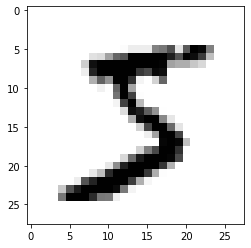

In [1097]:
fig, ax = plt.subplots(1,1)
plottable_image = np.reshape(X_train[0], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')
print('The label in Y_train is', Y_train[0])

## (b)

In [1098]:
X_train.shape

(60000, 28, 28)

In [1099]:
X_test.shape

(10000, 28, 28)

In [1100]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [1101]:
x_test_normal = NormalizeData(X_test)

In [1102]:
x_train_normal = NormalizeData(X_train)

## (c)

In [1103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [1104]:
# Label Encoding
labelencoder = LabelEncoder()
Y_train_label = labelencoder.fit_transform(np.array(Y_train))

# One-Hot Encoder
enc = OneHotEncoder(sparse = False,handle_unknown='ignore')
Y_train_encode = enc.fit_transform(Y_train_label.reshape(-1,1))

In [1105]:
print(Y_train_encode)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
Y_test_label = labelencoder.fit_transform(np.array(Y_test))
Y_test_encode = enc.fit_transform(Y_test_label.reshape(-1,1))

In [13]:
print(Y_test_encode)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Benefits

One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.

Determining the state has a low and constant cost of accessing one flip-flop

Changing the state has the constant cost of accessing two flip-flops

Easy to design and modify

Easy to detect illegal states

Using an one-hot encoding typically allows a state machine to run at a faster clock rate than any other encoding of that state machine

# Q3.

## (a)

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [15]:
trainsamples, nx_train, ny_train = x_train_normal.shape
X_train_data = x_train_normal.reshape((trainsamples,nx_train*ny_train))

In [16]:
testsample, nx_test,ny_test = x_test_normal.shape
X_test_data = x_test_normal.reshape((testsample,nx_test*ny_test))

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_data,Y_train_encode)

KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.score(X_test_data,Y_test_encode)

0.9558

In [19]:
print(f'Test error for KNN Alogrithm is {round(1-0.9558,4)*100}%')

Test error for KNN Alogrithm is 4.42%


Here, the test error for KNN is out perform than what we have in the report (5%)

### Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
treebase = DecisionTreeClassifier(criterion='entropy',max_depth=15)

In [22]:
ada_clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.3, base_estimator=treebase)

In [23]:
ada_clf.fit(X_train_data,Y_train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15),
                   learning_rate=0.3, n_estimators=100)

In [24]:
ada_clf.score(X_test_data,Y_test_label)

0.9644

In [25]:
print(f'Test error for AdaBoost Alogrithm is {round((1-0.9659)*100,3)}%')

Test error for AdaBoost Alogrithm is 3.41%


### SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(kernel='rbf',cache_size=500)

In [28]:
svm.fit(X_train_data,Y_train_label)

SVC(cache_size=500)

In [29]:
svm.score(X_test_data,Y_test_label)

0.9792

In [30]:
print(f'Test error for SVM Alogrithm is {round((1-0.9799)*100,3)}%')

Test error for SVM Alogrithm is 2.01%


Here, the test error for SVM is higher than what we have in the report (1.4%). This happens may due to the choice of different random state that some train splits have a better performance than the others.

## (b)

### RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(bootstrap=True, max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rf_clf.fit(X_train_data,Y_train_label)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400, random_state=42)

In [33]:
rf_clf.score(X_test_data,Y_test_label)

0.9717

In [39]:
print('test set accuracy(Random Forest): 0.9717')

test set accuracy(Random Forest): 0.9717


In [35]:
from sklearn.model_selection import cross_val_score

### GridSearchCV with Logistic Regression

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [37]:
pipe1 = Pipeline([('pca',PCA(n_components=2)),                  # reduce dimensions
                 ('lr',LogisticRegression(solver='saga',
                                          max_iter=1000)),  # classifier
                ])

In [42]:
X_trainnew =[]
X_testnew =[]
for i in range(len(x_train_normal)):
    X_trainnew.append(x_train_normal[i].flatten())
    
for i in range(len(x_test_normal)):
    X_testnew.append(x_test_normal[i].flatten())
# Set it as array
X_trainnew = np.array(X_trainnew)
X_testnew = np.array(X_testnew)

In [43]:
params1 = {'pca__n_components':[2,10,20,30,40,50],
          'lr__penalty':['l1','l2'],
          'lr__C':[.01,1,10,100]}

gscv = GridSearchCV(pipe1, params1, cv=3).fit(X_trainnew,Y_train_label)

gscv.best_params_

/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sa

{'lr__C': 10, 'lr__penalty': 'l2', 'pca__n_components': 50}

In [44]:
score = gscv.score(X_testnew,Y_test_label)
print(f'test set accuracy(Logistic Regression): {score:0.3f}')

test set accuracy(Logistic Regression): 0.912


### Using CNN 

In [48]:
import tensorflow as tf
from collections import deque
from tensorflow.keras import Input
from tensorflow.keras import layers,Model

In [50]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape = [28,28]))
tf.keras.layers.Conv2D(16,(3,3),padding = 'same', activation = 'relu')
tf.keras.layers.Conv2D(32,(7,7),padding = 'same', activation = 'softmax')
model.add(tf.keras.layers.Dense(units = 250, activation = 'relu'))
model.add(tf.keras.layers.Dense(units =  250, activation = 'softmax'))
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
history = model.fit(x_train_normal,Y_train_label, epochs = 20,validation_data = 0)
model.evaluate(x_test_normal,Y_test_label)
              

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.9258
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1028 - accuracy: 0.9702
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0697 - accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9842
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

[0.09960538148880005, 0.9807999730110168]

In [51]:
print(f'Test error for CNN Alogrithm is {round((1-0.9807000160217285)*100,3)}%')

Test error for CNN Alogrithm is 1.93%


Here, by using CNN Algotithm, the test error finally out perform all three of the classifier I
implemented in part 2(a)

# Q4.

## 3. ANN

### (a) & (b)

The first plot is the average training/test cross-entropy error vs number of epochs

The second plot is the classification error (in percentage) vs. number of epochs,

In [1106]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms
from matplotlib.pyplot import figure



In [1117]:
transform = transforms.ToTensor()

In [1116]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [1122]:
class Model(nn.Module):
    
    def __init__(self, in_features = 784, h1 = 100, out_features = 10):
        # one single layer neural network
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.out = nn.Linear(h1,out_features)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = self.out(x)
        
        return F.log_softmax(x, dim=1) 

In [1123]:
# initialize the model we defined and define the loss 
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [1124]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1125]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.38627255  accuracy:  77.770%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.34418938  accuracy:  83.480%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.32222834  accuracy:  85.822%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.03516741  accuracy:  99.445%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.02276338  accuracy:  99.455%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.01355867  accuracy:  99.413%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00689962  accuracy:  99.960%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00866953  accuracy:  99.955%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00729279  accuracy:  99.947%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00627813  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00205183  accuracy:  99.998%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00054895  accuracy:  99.997%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00112222  accuracy: 100.000%
epoch: 120 

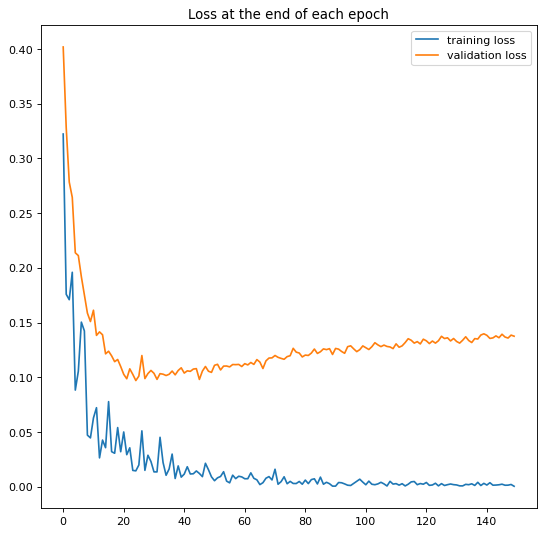

In [1126]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

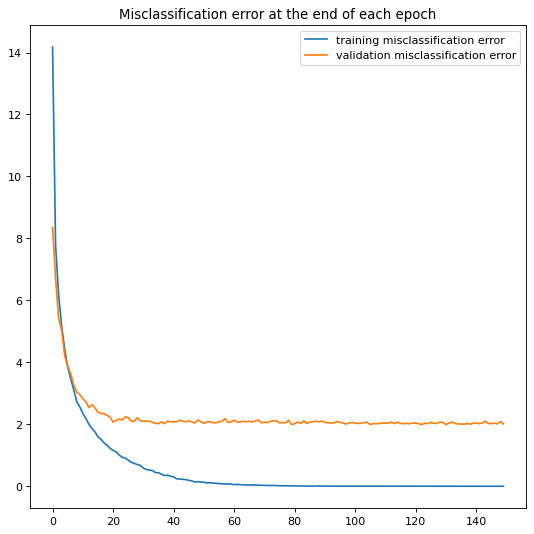

In [1127]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1128]:
# 2nd trainning
start_time = time.time()

torch.manual_seed(44)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00142337  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00238367  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00128410  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00131633  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00242944  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00039310  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00183145  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00088600  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00136517  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00090845  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00091003  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00106497  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00103335  accuracy: 100.000%
epoch: 120 

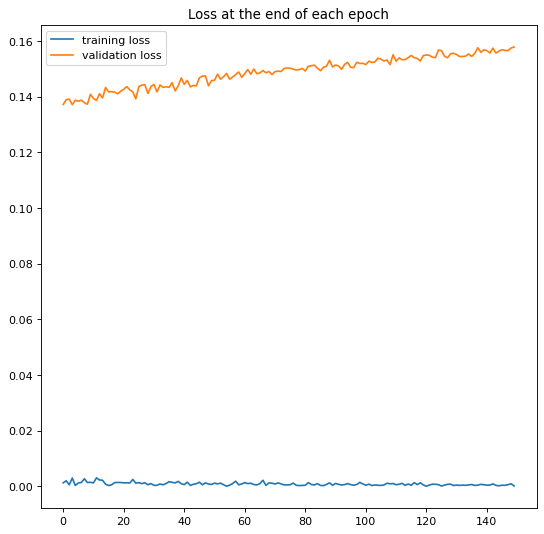

In [1129]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();


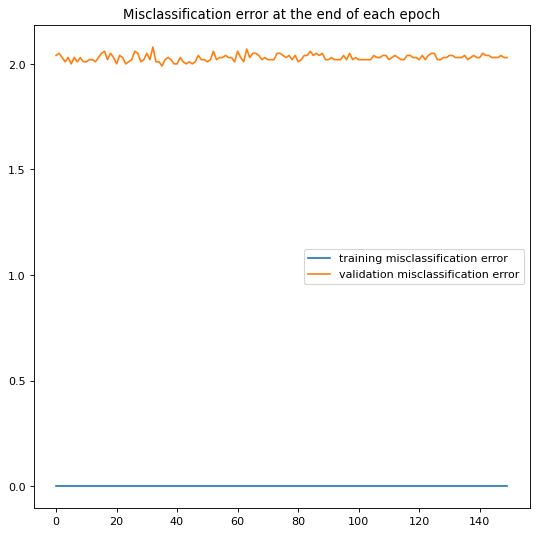

In [1130]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [660]:
# 3rd trainning
start_time = time.time()

torch.manual_seed(52)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00083876  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00108778  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00057049  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00027540  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00073948  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00030312  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00029385  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00017869  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00011337  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00026005  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00027494  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00042380  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00062476  accuracy: 100.000%
epoch: 120 

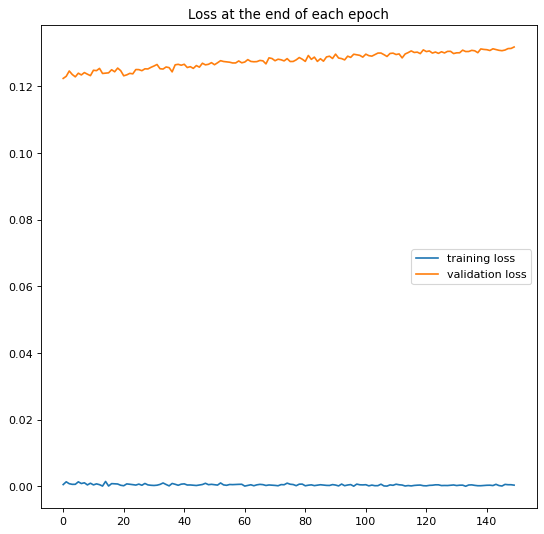

In [661]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

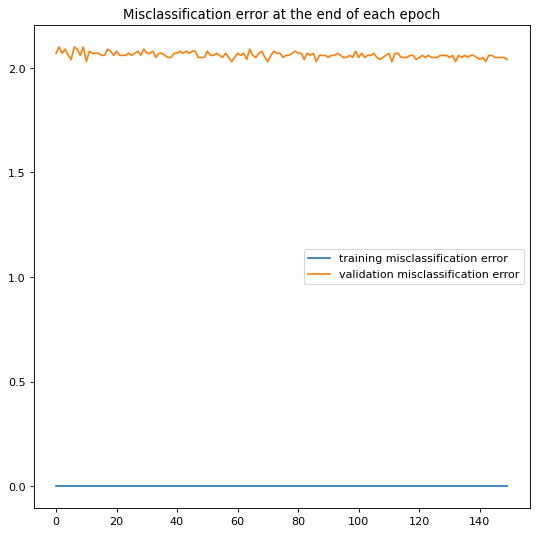

In [662]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [663]:
# 4th trainning
start_time = time.time()

torch.manual_seed(22)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00015524  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00037434  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00047704  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00004869  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00019146  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00025352  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00075640  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00017650  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00029315  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00025815  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00020435  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00039428  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00019074  accuracy: 100.000%
epoch: 120 

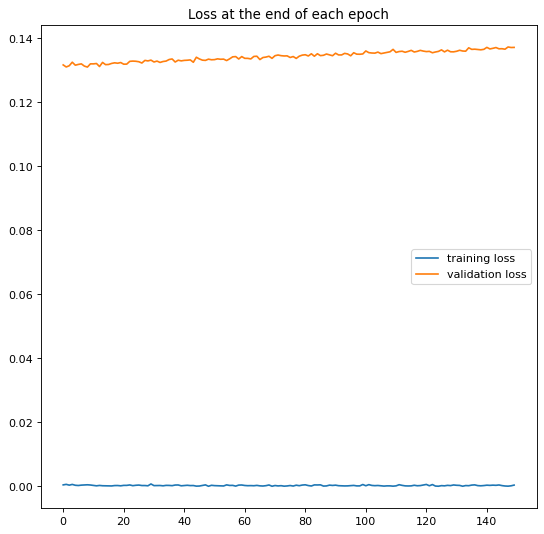

In [664]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

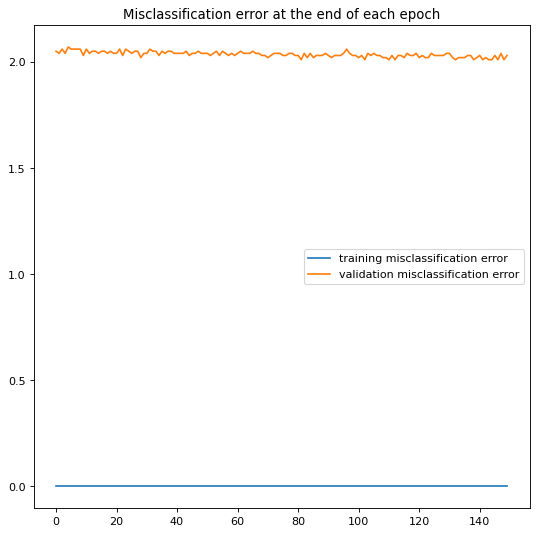

In [665]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [666]:
# 5th trainning
start_time = time.time()

torch.manual_seed(77)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00032810  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00021325  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00039641  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00031812  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00024417  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00013397  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00018389  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00034384  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00011700  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00020042  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00009319  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00013690  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00018510  accuracy: 100.000%
epoch: 120 

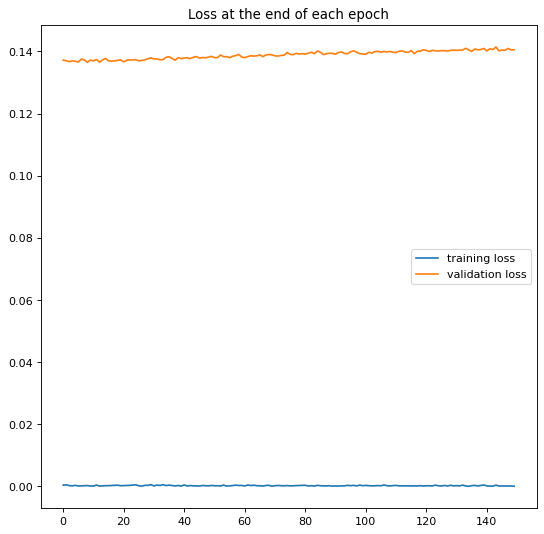

In [667]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

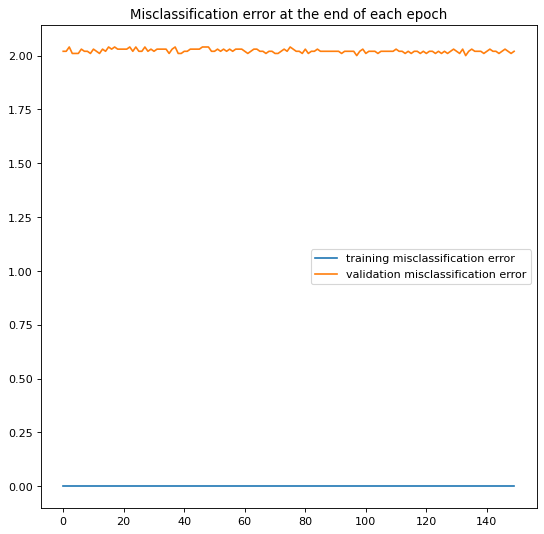

In [668]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [669]:
# 6th trainning
start_time = time.time()

torch.manual_seed(71)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00021223  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00030008  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00011667  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00009274  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00016770  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00026743  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00006439  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00037118  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00020274  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00018378  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00023930  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00012491  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00023352  accuracy: 100.000%
epoch: 120 

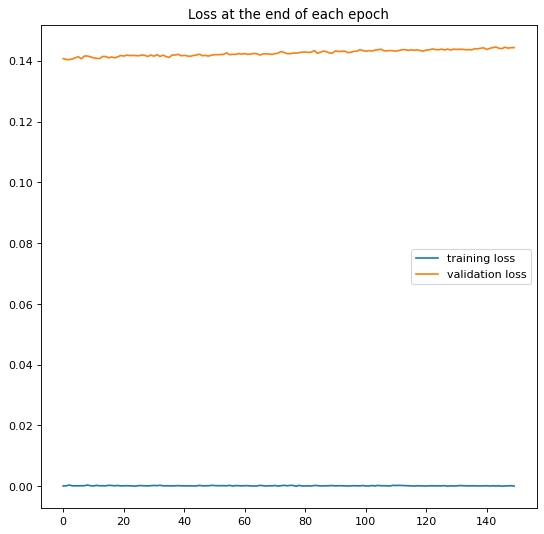

In [670]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

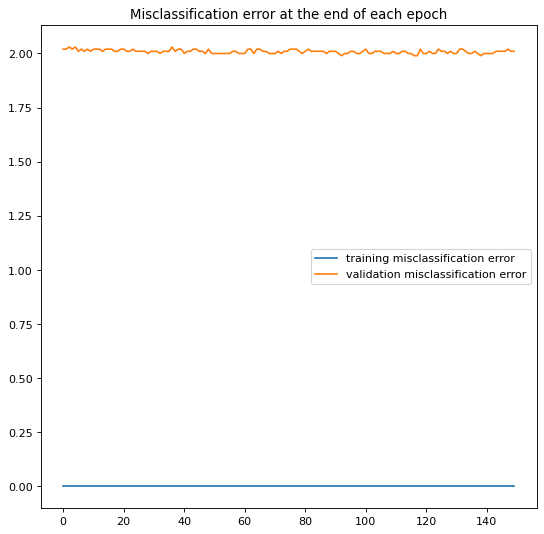

In [671]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

### Difference between a&b

By comparing to those two different types of plots we can find out that for plots in (a), the validation loss starts to increase after a point. In my model at learning rate 0.1, it starts the increasing trend at the beginning of the 2nd trainning and loss gradually getting more and more during the rest training. 

For the plots in (b), we will find out that the misclassification error (in percentage) eventually converged to a certain percentage, in this model it's around 2%, and it does not change much as we keep doing more trainnings


As a result, this model obtain its best prediction in around the 4th trainning. 

### (c)

In [1133]:
from sklearn.metrics import confusion_matrix
from torchvision.utils import make_grid

In [1134]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [1135]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9797/10000 =  97.970%


In [1136]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 971    0    4    0    1    3    4    1    5    0]
 [   0 1124    2    0    0    0    2    2    1    3]
 [   1    3 1009    4    3    0    0    7    2    0]
 [   1    1    1  989    0    7    1    4    7    3]
 [   1    0    2    0  965    2    5    0    3    7]
 [   0    0    0    4    0  867    2    0    4    3]
 [   2    1    3    0    3    5  943    0    4    1]
 [   1    1    4    3    2    1    1 1004    2    3]
 [   2    5    6    3    2    5    0    4  943    7]
 [   1    0    1    7    6    2    0    6    3  982]]


In [1137]:
right_guess = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] == y_test[i]:
        right_guess = np.append(right_guess,i).astype('int64')
        
# Display the number of corrected guess
len(right_guess)

9797

In [1138]:
# Set up an iterator to feed batched rows
r = 100   # row size
row = iter(np.array_split(right_guess,len(right_guess)//r+1))

Label: [   7    2    1    0    4    1    4    9    5    9    0    6    9    0
    1    5    9    7    3    4    9    6    6    5    4    0    7    4
    0    1    3    1    3    4    7    2    7    1    2    1    1    7
    4    2    3    5    1    2    4    4    6    3    5    5    6    0
    4    1    9    5    7    8    9    3    7    4    6    4    3    0
    7    0    2    9    1    7    3    2    9    7    7    6    2    7
    8    4    7    3    6    1    3    6    9    3    1    4    1    7
    6    9]
Guess: [   7    2    1    0    4    1    4    9    5    9    0    6    9    0
    1    5    9    7    3    4    9    6    6    5    4    0    7    4
    0    1    3    1    3    4    7    2    7    1    2    1    1    7
    4    2    3    5    1    2    4    4    6    3    5    5    6    0
    4    1    9    5    7    8    9    3    7    4    6    4    3    0
    7    0    2    9    1    7    3    2    9    7    7    6    2    7
    8    4    7    3    6    1    3    6    9    3 

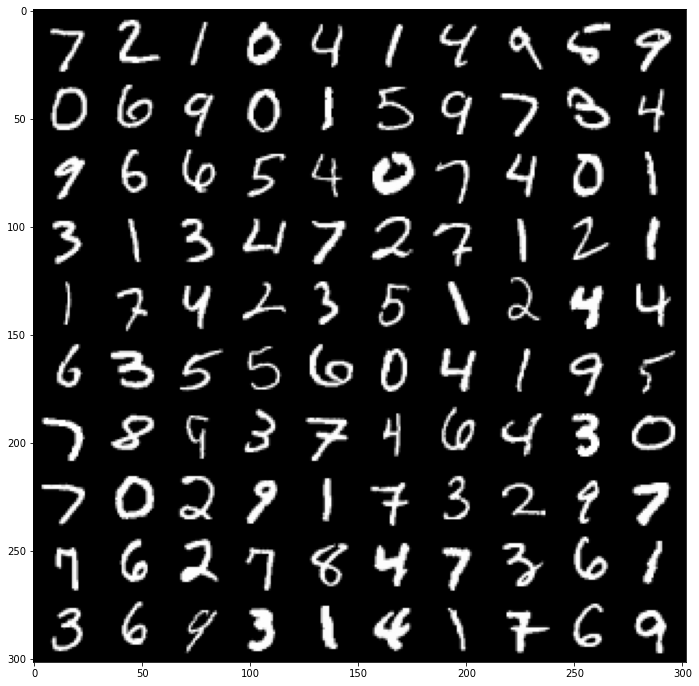

In [1139]:
nextrow = next(row)
# print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=10)
plt.figure(figsize=(30,12))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### (d)

For computational efficiency, I will only test those parameters invidually and remains the other parameters the same as what I did in part a&b instead of testing all the combinations.

###  learning rate of 0.01

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [406]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [ ]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

In [ ]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

###  learning rate of 0.2

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [ ]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [ ]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

In [ ]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

###  learning rate of 0.5

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [ ]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

### momentum of 0.0

Which is the same as what we did in part a&b

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

### momentum of 0.5

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

In [ ]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

### momentum of 0.9

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [ ]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

## 4. CNN

Since CNN works with immages, we would like to have relatively small batches

In [604]:
train_loader = DataLoader(train_data, batch_size=20, shuffle=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False)

### a&b

In [12]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        # one 2-D convolutional layers
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.out = nn.Linear(13*13*16,10)

    def forward(self, X):
        # one 2-D convolutional layers -> Relu activation -> Maxpooling
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1,13*13*16)      
        X = self.out(X)
        return F.log_softmax(X, dim=1)

In [20]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (out): Linear(in_features=2704, out_features=10, bias=True)
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.1)

In [22]:
import time
start_time = time.time()

epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%6000 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03005195  accuracy:  95.060%
epoch: 30  batch: 6000 [ 60000/60000]  loss: 0.00009294  accuracy:  99.967%
epoch: 60  batch: 6000 [ 60000/60000]  loss: 0.00000144  accuracy: 100.000%
epoch: 90  batch: 6000 [ 60000/60000]  loss: 0.00017801  accuracy: 100.000%
epoch: 120  batch: 6000 [ 60000/60000]  loss: 0.00000007  accuracy: 100.000%

Duration: 2159 seconds


## Plot the loss and accuracy comparisons

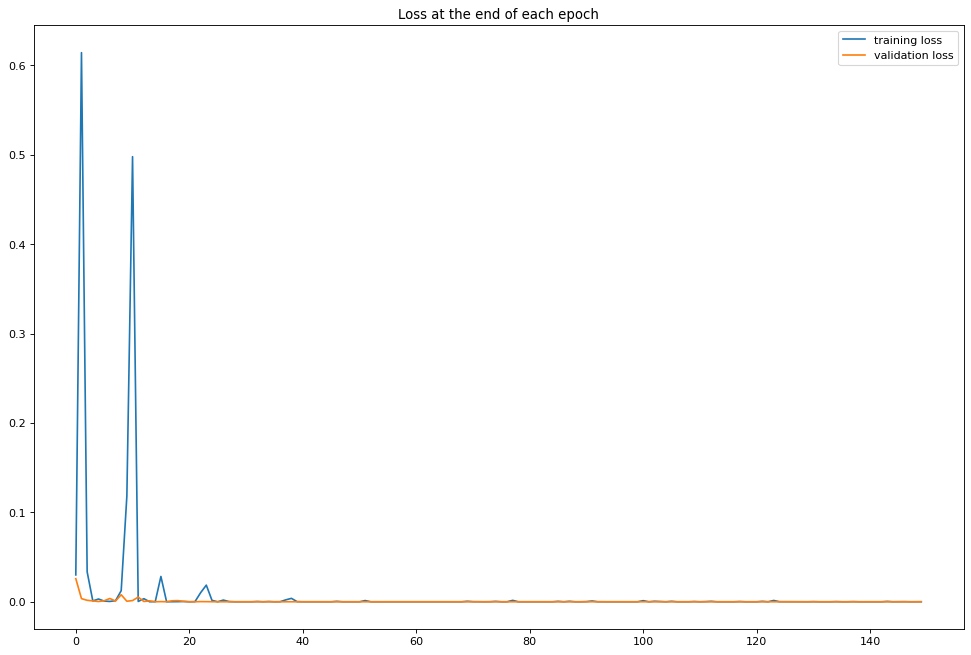

In [33]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

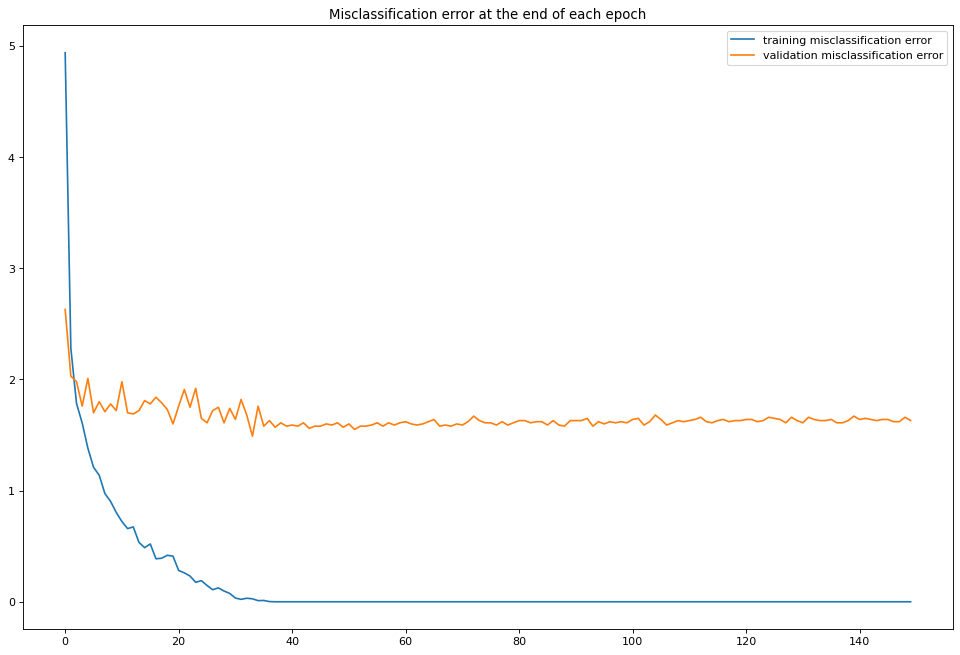

In [34]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [35]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [36]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9837/10000 =  98.370%


## 5. Beat the performance of SVM with Gaussian Kernel

In [47]:
train_loader = DataLoader(train_data, batch_size=20, shuffle=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False)

In [48]:
## two 2-D convolutional layers,two fully connected hidden layers

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 25, 3, 1)
        self.fc1 = nn.Linear(5*5*25, 200)
        self.fc2 = nn.Linear(200, 100)
        self.out = nn.Linear(100,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*25)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return F.log_softmax(X, dim=1)

In [49]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 25, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=625, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.011)

In [51]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%6000 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            


Duration: 2093 seconds


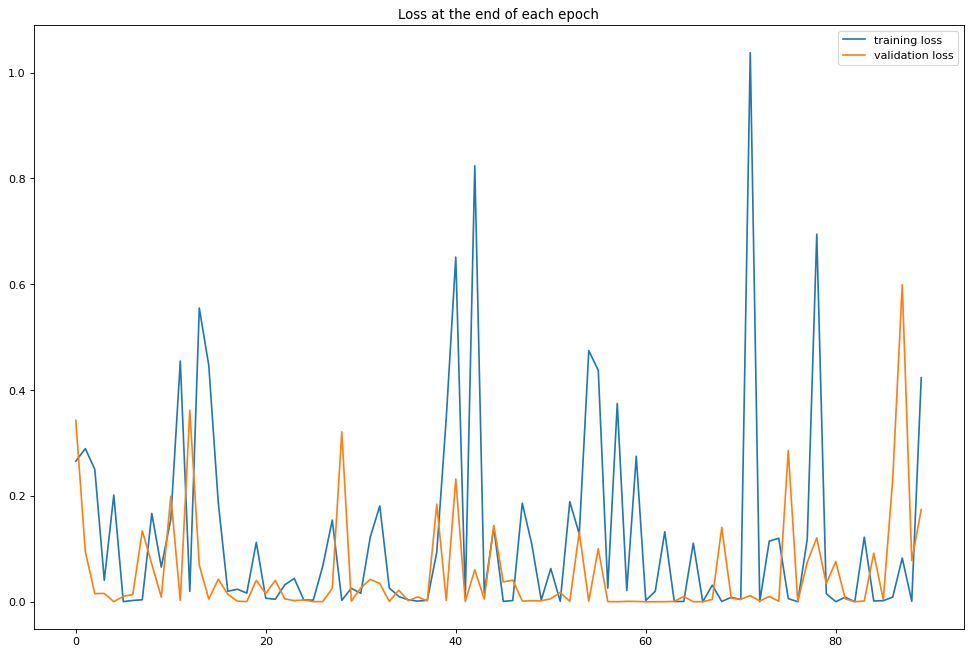

In [52]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

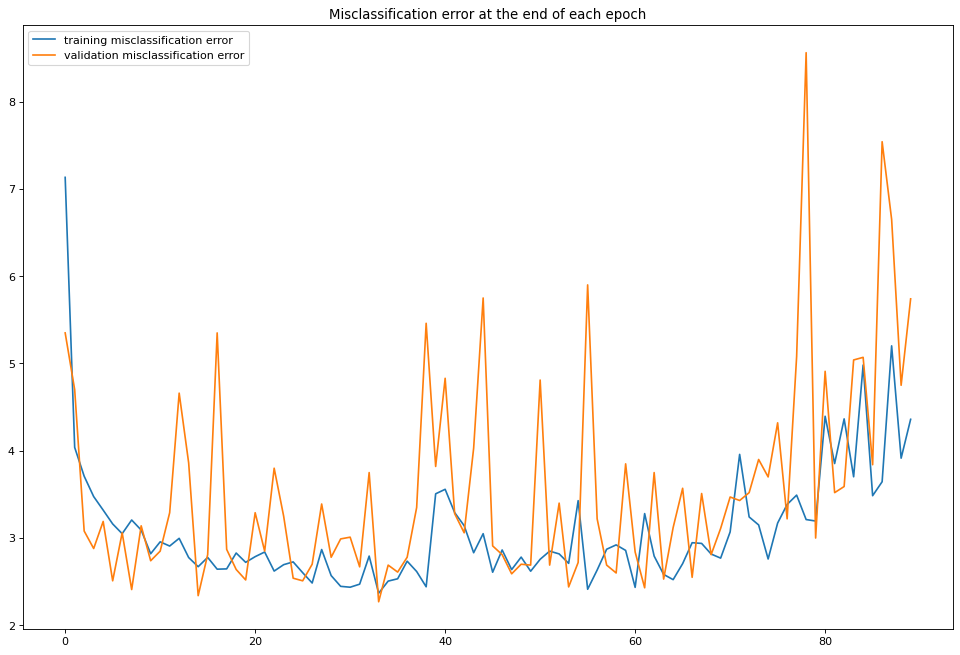

In [53]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [54]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [55]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9426/10000 =  94.260%


In [ ]:
## Different parameters 

In [174]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [177]:
for i, item in enumerate(train_loader):
    break
item

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [58]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [59]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

In [62]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.04055626  accuracy:  78.417%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.08253473  accuracy:  85.800%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.36470515  accuracy:  88.689%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.01839539  accuracy:  90.525%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00845351  accuracy:  91.687%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00152980  accuracy:  92.506%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.56773758  accuracy:  93.152%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.02005100  accuracy:  93.615%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00804485  accuracy:  94.030%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03698274  accuracy:  94.340%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.01521602  accuracy:  97.683%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.03986984  accuracy:  97.842%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00137782  accuracy:  97.944%
epoch:  1  b

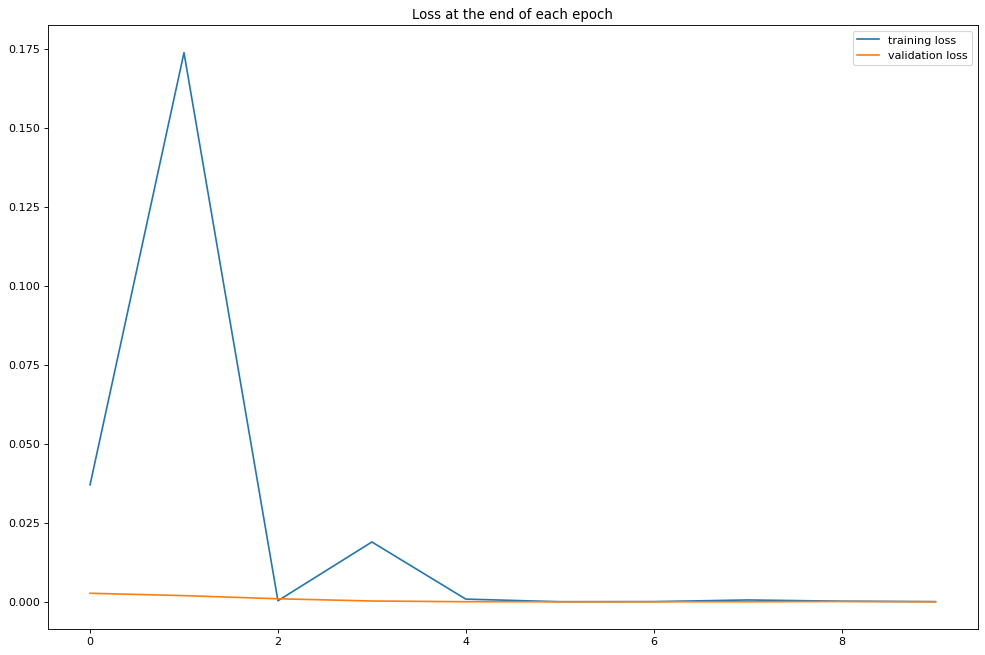

In [63]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

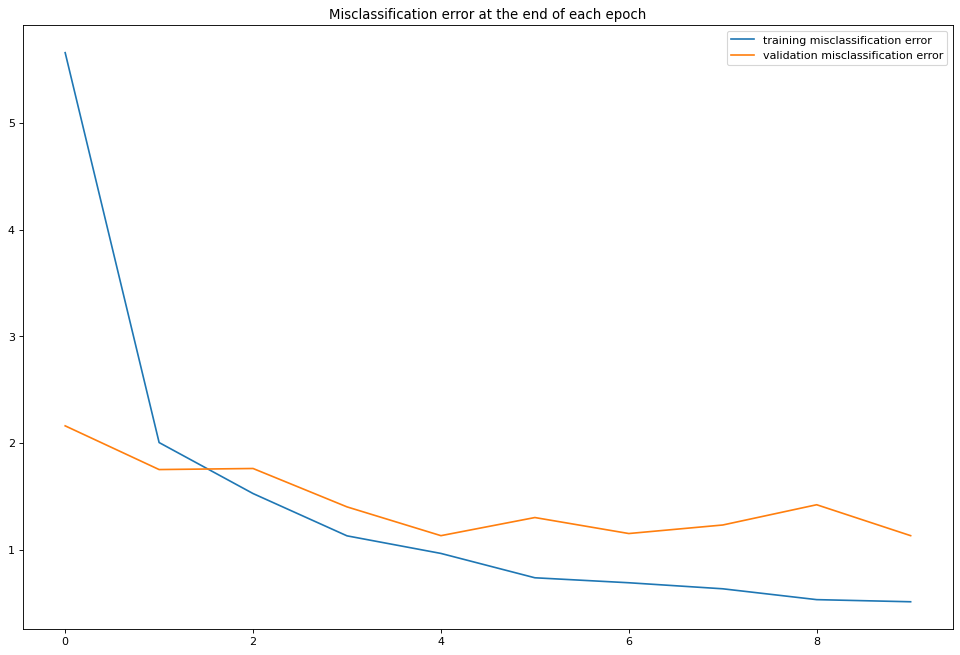

In [64]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [65]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9887/10000 =  98.870%


In [72]:
print(f'Test error: {round(100-98.97,3)}%, which is less than 1.4% we obtained from SVM with Gaussian Kernel' )

Test error: 1.03%, which is less than 1.4% we obtained from SVM with Gaussian Kernel


# Q5.

In [383]:
from sklearn.preprocessing import StandardScaler

### (a)

In [1029]:
train_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/train.txt',
                        sep=',',names=range(1569))
train_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/train.txt'

In [1030]:
train_q5.shape

(20000, 1569)

In [1031]:
np.unique(train_q5.iloc[:,1568].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [1032]:

val_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/val.txt',
                        sep=',',names=range(1569))
val_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/val.txt'

In [1033]:
val_q5.shape

(5000, 1569)

In [1034]:
np.unique(val_q5.iloc[:,1568].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [1035]:

test_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/test.txt',
                        sep=',',names=range(1569))
test_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/test.txt'

In [1036]:
test_q5.shape

(5000, 1569)

In [1037]:
np.unique(train_q5.iloc[:,1568:1569].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

The last coordinate is the label

###  Data Prepare

In [1542]:
class CustomerDataset(Dataset):
    def __init__(self, file_path):
        file_out = pd.read_table(file_path,sep=',',names=range(1569))
        X = file_out.iloc[:,:1568].values
        y = file_out.iloc[:,1568].values
        # Standardlize y
        sc = StandardScaler()
        X = sc.fit_transform(X)
        # convert to tensor
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y)
        
    def __len__(self):
        return len(self.y) 
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
        
        

In [1543]:
train_q5 = CustomerDataset(train_path)
val_q5 = CustomerDataset(val_path)
test_q5 = CustomerDataset(test_path)

### (b)

### ANN

In [1544]:
train_loader = DataLoader(train_q5, batch_size=100, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=100, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=500, shuffle=False)

In [1545]:
for b, (X_train, y_train) in enumerate(train_loader):
    break
y_train

tensor([ 9, 10, 11,  7, 10,  7,  5,  8,  5, 16, 12,  5, 15, 11,  1,  6, 10,  9,
         7,  7, 11,  7,  7, 12,  6,  8, 14,  7, 18, 10, 10,  2,  2,  7,  7,  7,
        11,  4,  7,  9,  9,  4,  9,  8, 10,  9,  5, 16,  9,  8, 15,  6,  2, 10,
         6, 12,  7,  8,  7,  6,  1,  9,  9,  6,  9, 10,  6,  4,  0,  7,  4,  9,
        15,  6, 12, 11, 11, 14, 11,  8,  6,  4,  2,  5,  9,  2, 16, 13, 12,  9,
         4,  4, 14,  6,  6, 10,  8, 15, 15,  7])

In [1546]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=1568, out_sz=19, layers=[784,120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],layers[2])
        self.fc4 = nn.Linear(layers[2],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

In [1547]:
torch.manual_seed(42)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=1568, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=19, bias=True)
)

In [1548]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [1549]:
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_vali)  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 1.25705862  accuracy:  38.160%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.62453997  accuracy:  71.855%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.74645686  accuracy:  82.770%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.41702273  accuracy:  88.175%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.33985245  accuracy:  92.365%
epoch:  5  batch:  200 [ 20000/60000]  loss: 0.19088845  accuracy:  94.565%
epoch:  6  batch:  200 [ 20000/60000]  loss: 0.18829584  accuracy:  96.140%
epoch:  7  batch:  200 [ 20000/60000]  loss: 0.08044560  accuracy:  97.745%
epoch:  8  batch:  200 [ 20000/60000]  loss: 0.07231690  accuracy:  97.510%
epoch:  9  batch:  200 [ 20000/60000]  loss: 0.27361739  accuracy:  95.670%
epoch: 10  batch:  200 [ 20000/60000]  loss: 0.12407091  accuracy:  96.360%
epoch: 11  batch:  200 [ 20000/60000]  loss: 0.08757715  accuracy:  97.060%
epoch: 12  batch:  200 [ 20000/60000]  loss: 0.07580175  accuracy:  97.715%
epoch: 13  b

epoch: 108  batch:  200 [ 20000/60000]  loss: 0.00311539  accuracy:  99.720%
epoch: 109  batch:  200 [ 20000/60000]  loss: 0.00170598  accuracy:  99.800%
epoch: 110  batch:  200 [ 20000/60000]  loss: 0.01181535  accuracy:  99.720%
epoch: 111  batch:  200 [ 20000/60000]  loss: 0.08539143  accuracy:  99.555%
epoch: 112  batch:  200 [ 20000/60000]  loss: 0.00051447  accuracy:  98.840%
epoch: 113  batch:  200 [ 20000/60000]  loss: 0.05915627  accuracy:  99.150%
epoch: 114  batch:  200 [ 20000/60000]  loss: 0.00985572  accuracy:  99.050%
epoch: 115  batch:  200 [ 20000/60000]  loss: 0.00020214  accuracy:  99.355%
epoch: 116  batch:  200 [ 20000/60000]  loss: 0.02084630  accuracy:  99.545%
epoch: 117  batch:  200 [ 20000/60000]  loss: 0.00068072  accuracy:  99.450%
epoch: 118  batch:  200 [ 20000/60000]  loss: 0.01468053  accuracy:  99.290%
epoch: 119  batch:  200 [ 20000/60000]  loss: 0.00989334  accuracy:  99.540%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.01289255  accuracy:  99.545%

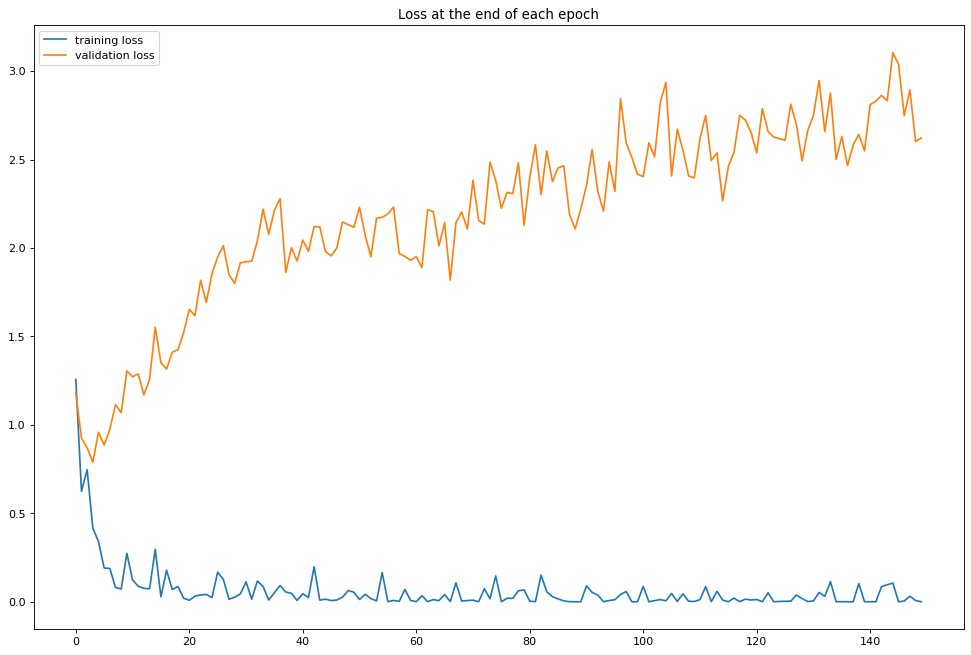

In [1556]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

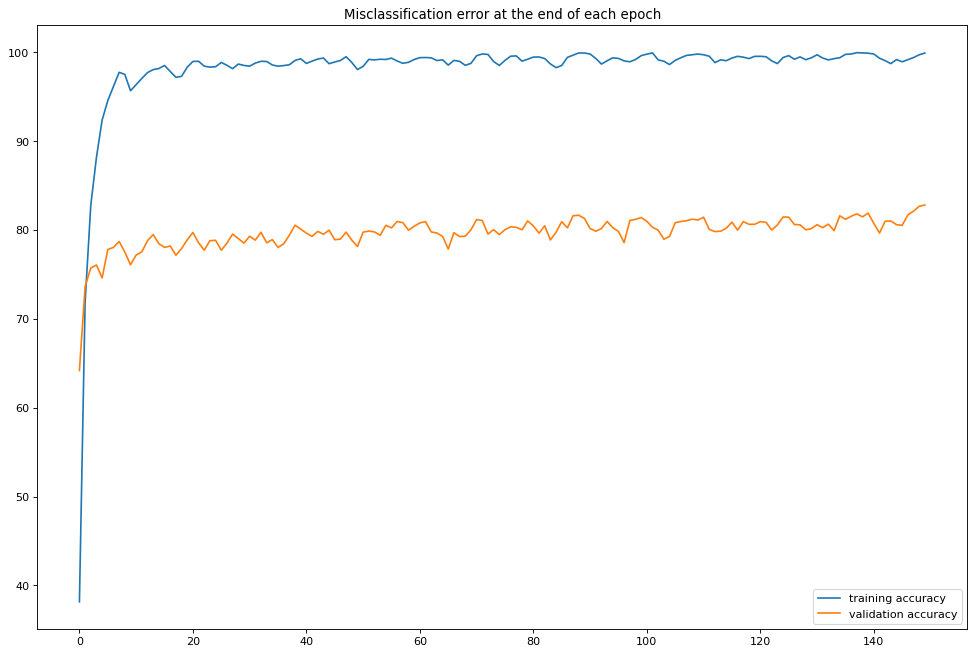

In [1557]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1558]:
train_cc = [t/200 for t in train_correct]
test_cc = [t/50 for t in test_correct]

In [1559]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_q5, batch_size=5000, shuffle=False)

In [1560]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(X_test)} = {correct.item()*100/(len(X_test)):7.3f}%')

Test accuracy: 4141/5000 =  82.820%


In [1561]:
max_index = test_cc.index(max(test_cc))
max_index

149

### CNN

In [1489]:
class CustomerDataset(Dataset):
    def __init__(self, file_path):
        file_out = pd.read_table(file_path,sep=',',names=range(1569))
        X = np.array(file_out.iloc[:,:1568].values).reshape(file_out.shape[0],28,56)
#         empty = []
        
#         for i in range (int(X.shape[0]/2)):
#             X = np.concatenate((temp1[0],temp1[1]),0)
#             empty.append(X)
#             i+=2
#         X = empty
        y = file_out.iloc[:,1568].values
        # convert to tensor
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y)
        
    def __len__(self):
        return len(self.y) 
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
        

In [1490]:
train_q5 = CustomerDataset(train_path)
val_q5 = CustomerDataset(val_path)
test_q5 = CustomerDataset(test_path)

In [1491]:
train_loader = DataLoader(train_q5, batch_size=10, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=10, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=10, shuffle=False)

In [1497]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*12*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,19)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)    
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*12*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [1524]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=960, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=19, bias=True)
)

In [1525]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

In [1526]:
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 70
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train.view(10,1,28,56)) 
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%10==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(val_loader):

            # Apply the model
            y_val = cnn_model(X_vali.view(10,1,28,56))

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
            
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 2.45193720  accuracy:  12.567%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 1.95093596  accuracy:  19.508%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 1.45480847  accuracy:  26.933%
epoch: 10  batch:  600 [  6000/60000]  loss: 0.06125475  accuracy:  97.600%
epoch: 10  batch: 1200 [ 12000/60000]  loss: 0.06559862  accuracy:  97.017%
epoch: 10  batch: 1800 [ 18000/60000]  loss: 0.22830176  accuracy:  96.711%
epoch: 20  batch:  600 [  6000/60000]  loss: 0.00678120  accuracy:  99.167%
epoch: 20  batch: 1200 [ 12000/60000]  loss: 0.00021980  accuracy:  98.742%
epoch: 20  batch: 1800 [ 18000/60000]  loss: 0.01231803  accuracy:  98.567%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00005814  accuracy:  99.383%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.00109983  accuracy:  99.283%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.00002539  accuracy:  99.194%
epoch: 40  batch:  600 [  6000/60000]  loss: 0.00716525  accuracy:  99.583%
epoch: 40  b

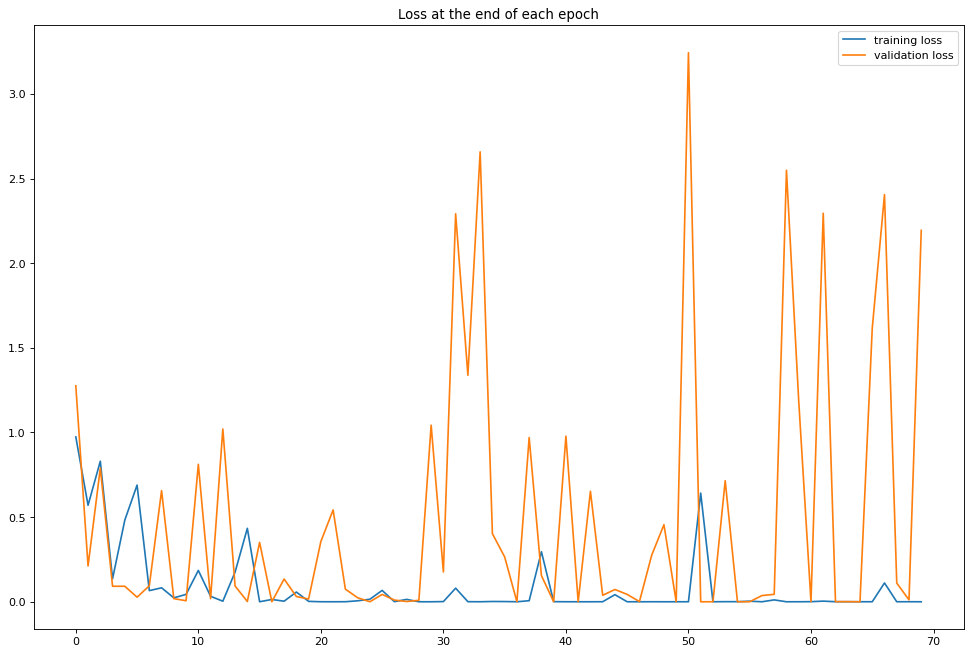

In [1534]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

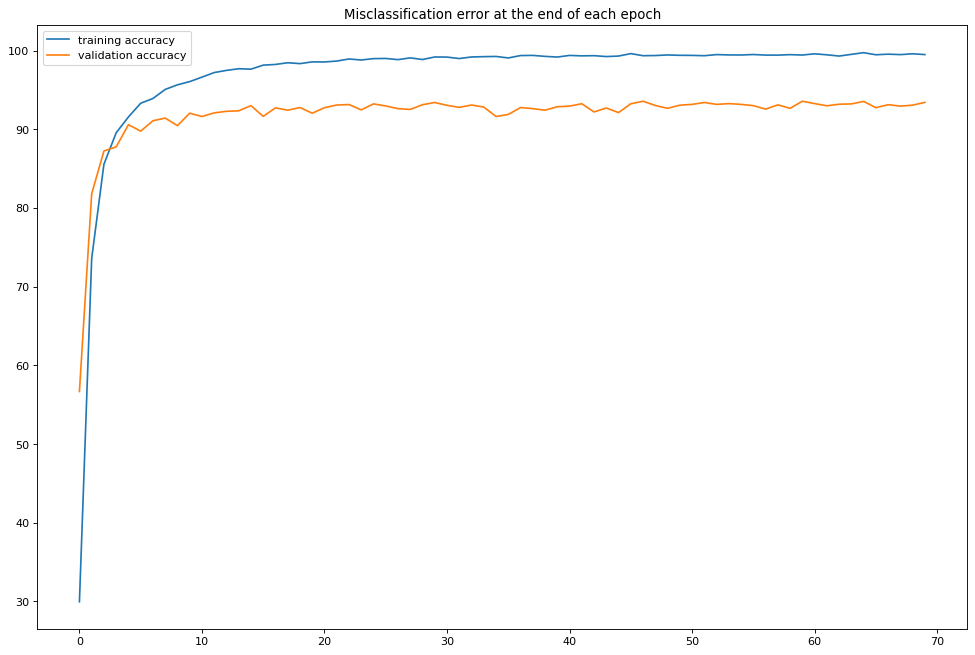

In [1535]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1536]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_q5, batch_size=5000, shuffle=False)

In [1537]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test.view(5000,1,28,56))  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(X_test)} = {correct.item()*100/(len(X_test)):7.3f}%')

Test accuracy: 4698/5000 =  93.960%


In [1538]:
train_cc = [t/200 for t in train_correct]

In [1539]:
test_cc = [t/50 for t in test_correct]

In [1540]:
max_index = test_cc.index(max(test_cc))
max_index

46